# Lecture 9: Kaggle 2 kNN, Decision Trees, Random Forest, Ensemble Learning
## 11/6/18

### Hosted by and maintained by the [Statistics Undergraduate Students Association (SUSA)](https://susa.berkeley.edu). Originally authored by [Calvin Chen](mailto:chencalvin99@berkeley.edu), [Michelle Hao](mailto:mhao@berkeley.edu), and [Patrick Chao](mailto:prc@berkeley.edu).

### Table of Contents
* [Introduction](#intro)
* [Classification vs Regression](#class_vs_regress)
    * [Recap on Regression](#regress_recap)
    * [Some Intuition on Classification](#intuition)
        * [Real World Example](#real_world_example)
* [k-Nearest Neighbors](#knn)
    * [The Algorithm](#algorithm)
        * [Checkpoint](#checkpoint)
    * [Implementation Time!](#implementation)
        * [The Dataset](#dataset)
        * [Code it up](#coding)
    * [Decision Boundaries](#decision_boundaries)
    * [Bias Variance with kNN](#knn_bias_variance)
        * [Warm Up](#warm_up)
        * [Investigating values of k](#investigating_k)
        * [Test Yourself](#test_yourself)
    * [sklearn and kNN](#sklearn_knn)
        * [Importing Libraries and Preparing the Data](#importing_and_prepare)
        * [Using KNN for classification](#knn_classification)
* [Decision Trees](#decision_trees)
    * [Entropy](#entropy)
    * [Back to Decision Trees](#back_to_decision_trees)
* [Ensemble Learning](#ensemble_learning)
* [Bootstrapping and Bagging](#bootstrapping_and_bagging)
* [Random Forest](#random_forest)
* [Boosting](#boosting)
* [Homework](#homework)
        

<a id='intro'></a>
# Introduction

<a id='class_vs_regress'></a>
# Classification vs Regression

So, over the past few lectures, we've been talking about different Machine Learning models that you can create to help you **fit to an possible underlying trend in a dataset** and **generalize well to other data points**. However, a lot of the different models we have been creating are what we call **regression models**. Today, we'll be talking about another type of modeling: **classification**.

<a id='regress_recap'></a>
## Recap on Regression

Just to give a brief recap on what regression models are and what they do:
- Input a set of continuous variables as features
- Output a continuous value as its prediction
- Not good with discrete variables or categorial variables
- Many types of regression models, such as linear regression, neural networks (next week), decision trees (this week)

As we saw from the Linear Regression lecture, regression models can be incredibly useful in terms of predicting **continuous variables**, but not that well with predicting **discrete variables**.

# Classification vs Regression

We have currently dealt with problems where we predict continuous values, such as predicting weight given height. However, there exist many other classes of problems in the world. One common one is **classification**. Given a picture of an animal, what kind of animal is it? Is it a cat? Is it a dog? Rather than outputting a value (e.g a weight of 150 pounds), we would like to output a label, e.g. dog. 

In order to create models that are good at predicting discrete variables, we must introduce a new type of modelling: **classification** models. These models are useful for when we want to classify some sample inputs into classes or categories. They can:
- Input lists of features of a sample and output a class or label
- Can take in discrete or categorical variables
- Can involve generating a probability for an output to be each different class, and selecting the class with the highest probability

Today, we'll be focusing a lot of different classification models, and different circumstances under which these kinds of models would be useful, as well as the different implementations for these models.

<a id='intuition'></a>
## Some Intuition on Classification

Let's take a look at the following picture:

<img src='pictures/machine_learning_classification_graph.png'>

**Question:** Let's say we introduced a new point $X$ into the picture above. What would you guess the type (or class) the point would be?

From the picture, the intuition behind predicting $X$ would be to just look at the different points nearby it! In other words, we can **predict the class of a point by looking at its closest neighbors.**

<a id='real_world_example'></a>
### Real World Example

One real world example of where predicting the class fo a point based off of its neighbors is with an upcoming exam. Let's say you ask two different people who already took the exam how hard it was, so you can gauge how hard it might be for yourself. But let's also say between the two people you ask, one is super duper smart and the other is Pass/No-Passing the class. Their perspectives of how difficult the test can be incredibly different from another. The super duper smart person might say the test was pretty easy, which may have been a result of their intellect and the time they put into studying for the exam. The person taking the class Pass/No Pass might think the test was incredibly hard, which may have been a result of them putting in less effort into the class due to the fact that they only need to Pass it.

So, we see that both people can have incredibly different responses (or classes) of how difficult the exam was, and both of their responses might not be useful to you, as their skill levels and the amount of preparation they put into the class may be very different from your owns. In order to accurately gauge how difficult the test might be, you want to ask people around you (in terms of skill level and amount of preparation)!

However, let's say you ask someone with around the same skill level/amount of preparation with you. That person could be a good indicator of how difficult the test might be for you, but asking that one person might not be enough. Let's say you wanted to ask more people in taking the same class what they thought of the exam. You could average out their responses, and get a general gist of how difficult the exam might be for yourself. However, if you continue to keep asking people, you might start asking people who are no longer similar to your skill level. Or, you get to the point where you ask a number close to the size of the class! At that point, how difficult you think the exam might be for you is just how difficult the exam itself was on average. So, we can see that not only are **the types of people you ask** an important to factor consider, but also **the number of people** you ask can affect your result as well.

The strategy that we used to determine how difficult the exam was going to be for yourself is implemented exactly how a famous algorithm in machine learning is implemented, called **k-Nearest Neighbors** (shortened as kNN).

<a id='knn'></a>
# k-Nearest Neighbors

**k-Nearest Neighbors** (kNN) is a simple, yet powerful algorithm that can be used to solve classification problems. 

The core idea is that inputs should be classified with other inputs that have similar features.

<a id='algorithm'></a>
## The Algorithm

<img src='pictures/KVisual.png' width="300" height="300">
<center> Image from: https://www.mdpi.com/2076-3417/8/1/28 </center>

The procedure for classifying an input $X$ for any general problem is as follows:
1. Pick a value of $k$. Note: You can choose any value for $k$. What works best varies from data set to data set, which can be determined by trial and error. 
2. Find the $k$ nearest neighbors to your input, according to some chosen distance metric (e.g. Euclidean distance)
3. Count the number of neighbors in each category.
4. Categorize the input based on the majority. 

<a id='checkpoint'></a>
### Checkpoint
> 1. In the figure above, what would the $?$ be categorized as when $k = 3$?
> 2. What about when $k = 11$?
> 3. What is the training time of kNN, or *runtime complexity*?

**Your Answers Here**   
1.  
2.  
3.  

<a id='implementation'></a>
## Implementation Time!

Now that we've gone over the bare bones of kNN, you get to implement it yourselves!

Before we jump into coding we'll introduce you to the data we'll be looking at. 

<a id='dataset'></a>
### The Dataset

<img src='pictures/iris.jpg' width="250" height="250">
<center> Image from: A Complete Guide to K-Nearest-Neighbors by Zakka </center>

The dataset we'll be using is the [Iris Flower Dataset](https://archive.ics.uci.edu/ml/datasets/Iris). It contains a series of observations on three species of Iris (Iris setosa, Iris virginica, and Iris verisolor). Each observation contains four features: the *petal length, petal width, sepal length, and sepal width*. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import seaborn as sns
import pandas as pd
from sklearn import neighbors, datasets
from sklearn.tree import DecisionTreeClassifier
from helpers import plot_tree
from helpers import plotPairwiseDecisionTrees

In [4]:
#importing the data
iris = datasets.load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['Sepal Length', 'Sepal Width','Petal Length','Petal Width'] + ['species'])

#y contains the correct classifications (0, 1, 2 for each type of Iris)
Y = iris["species"]


<a id='coding'></a>
### Code it up
The following helper functions will be useful!


In [5]:
#Returns the Euclidian distance between two iris data points.
def distance(x1, x2):
    #print("finding dist btwn:", x1, x2)
    for i in range(len(x1)):
        # YOUR CODE HERE
    #    sq_diff = ...
    #return ...
        # TO REMOVE
        sq_diff = np.square(x1-x2)
    return np.sum(sq_diff)

#Returns a numpy array containing the classifications of the k closest data points
#k is the number of neighbors, iris is the input we are trying to classify
#irisData is the training dataset, and y contains the classifications for the training dataset
def getKClosestClassifications(k, iris, irisData, y):
    distances = []
    
    #Get the distance from iris to every single classified iris
    for i in range(irisData.shape[0]):
        dist = distance(irisData.iloc[i,:], iris);
        distances.append((dist,i))
        
    #Sort the array of distances
    distances = sorted(distances,key = lambda x:x[0])
    
    #Get the indicies of the k closest irisis
    indicies = [x[1] for x in distances[:k]]
    
    return [y[i] for i in indicies]

**Now it's your turn!**

In [6]:
'''Write a function (irisKNN) that takes in parameters: 
     - k 
     - iris (the input to be classified)
     - data (the training dataset)
     - y (the classifications for the training dataset)

     
    And returns 0, 1, or 2 as the kNN classification of iris
     
    *Note the following functions may be useful
        - getKClosestClassifications(k, iris, irisData, y)
            => returns a list containing the classifications [0, 1, or 2] 
                for each of the k closest data points to iris
        - lst.count(x)
            => returns the count of value 'x' in list 'lst'
'''

def irisKNN(k, iris, data, y):
    #YOUR CODE HERE 
    #return ...
    #TO REMOVE
    k_class = getKClosestClassifications(k, iris, data, y)
    return max(k_class, key=k_class.count)
        

Check your implementation

**Congrats! You've now implemented kNN.**

But you may have some questions. *What happens when the dataset is really really huge? What if the Euclidean distance isn't the best way to classify how close two points are? How do you chose a value for $k$?*

We'll start by briefly answering the first two.   

The prediction time for kNN is $O(n)$, which is much slower than something like linear regression, where the prediction is $O(1)$. This can be really computationally expensive if you would like to predict many points. There are possible speed ups, if you are curious look into [k-d trees](https://en.wikipedia.org/wiki/K-d_tree).

The distance function can actually be customized and designed to suit your particular dataset. For example, say you're classifying something based on features f1 and f2, where f1 is much more important than f2. In that case you can adjust accordingly by weighting the distance between the two f1 values much higher than distance between the two f2 values.  

As for the value of $k$, $k$ is something we pick depending on the model we are trying to build. You can think of choosing k testing many values and seeing which produces the best results (validation). We'll delve deeper into the affect $k$ has on the bias and variance of the model in a bit.


In [7]:
sol0 = irisKNN(100, iris.iloc[3,:], iris, Y)
sol1 = irisKNN(3, iris.iloc[65,:], iris, Y)
sol2 = irisKNN(9, iris.iloc[125,:], iris, Y)

print("Expected: " + str(Y[3]) + " kNN: "+ str(sol0))
print("Expected: " + str(Y[65]) + " kNN: "+ str(sol1))
print("Expected: " + str(Y[125]) + " kNN: "+ str(sol2))


Expected: 0.0 kNN: 0.0
Expected: 1.0 kNN: 1.0
Expected: 2.0 kNN: 2.0


<a id='decision_boundaries'></a>
## Decision Boundaries

If we've chosen a value for $k$, we can imagine the **decision boundaries** associated with our model. 

The picture below shows the boundary between the blue and yellow points.

<img src='pictures/decisionBoundary.png' width="300" height="300">
<center> Image from: "The Elements of Statistical Learning, by Hastie, Tibshirani, and Friedman.  </center>

The decision boundaries divide our feature space into sections that would be assigned the same classification. So any inputs that fall within the yellow space or blue space would be classified as yellow and blue respectively.

<a id='knn_bias_variance'></a>
## Bias Variance with kNN

Now, lets take a look at how our models are affected by the value of $k$.

<a id='warm_up'></a>
### A Warm Up

<img src='pictures/knn-variance1.png' width="700" height="700">
<center> Image from: http://ljdursi.github.io/ML-for-scientists/#1 </center>

For some intuition take a moment to consider these extreme cases: 
> 1. How would our model behave if $k = n$?  
> 2. What if $k = 1$?
> 3. Does $k=1$ or $k=n$ produce more jagged decision boundaries?
> 4. Does this indicate higher or lower variance?

**Your Thoughts Here**
1. 
2. 
3. 
4. 

<a id='investigating_k'></a>
## Investigating values of $k$


<img src='pictures/knn_k.png' width="900" height="900">
<center> Image from: Classification of Hand-written Digits (3) by DeWilde </center>

**k = 1**  
When $k=1$, our model always picks the closest neighbor and classifies the input respectively. In this case our decision boundaries would be jagged from overfitting to every single detail, and small changes in the training dataset would cause the decision boundary to shift a lot. Since the model will be varies heavily with new data, $k=1$ would create models with **high variance** and **low bias**. 

**k = n**  
On the other hand, when $k = n$, every single input would be categorized as the same. Consider the classification problem in the image above. There are more yellow than purple points, so when $k=n$ we'll always categorize the input as yellow no matter where it's located in our feature space. Because of this, kNN with $k=n$ would result in models that contain **low variance** and **high bias**.

#### tldr;
 - Variance **decreases** as $k$ **increases**
 - Bias **increases** as $k$ **increases**
 
 
Below is a gif of the decision boundaries evolving as $k$ increases in the iris dataset.
<img src="pictures/knn.gif" width="60%">


<a id='test_yourself'></a> 
### Test Yourself  
Which picture corresponds to high/low values of $k$?  

![alt text](pictures/BiasVariance.jpg "Bias Variance Visualization")

<a id='sklearn_knn'></a>
## sklearn and kNN

It would be a lot of work to write our own kNN and distance function every time we need it. So here's an example using sklearn's KNeighborsClassifier.

Credit to: https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification 

<a id='importing_and_prepare'></a>
### Importing Libraries and Preparing the Data

#### Import Libraries

In [8]:
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets

#### Summarize the dataset

In [9]:
iris.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
# Let’s now take a look at the number of instances (rows) that 
# belong to each class. We can view this as an absolute count.
iris.groupby('species').size()

species
0.0    50
1.0    50
2.0    50
dtype: int64

#### Dividing the Dataframe into Feature and Labels

In [11]:
feature_columns = ['Sepal Length', 'Sepal Width','Petal Length','Petal Width']
X = iris[feature_columns].values
Y = iris['species'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

#### Splitting the Data into Train and Test Sets

In [12]:
#Splitting dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

<a id='knn_classification'></a>
### Using KNN for classification

#### Making Predicitons

In [13]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

#### Evaluating Predictions

In [14]:
cm = confusion_matrix(Y_test, Y_pred)

#Calculating model accuracy
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + '%.')

Accuracy of our model is equal 96.67%.


#### Using cross-validation for parameter tuning

In [26]:
# creating list of K for KNN
k_list = list(range(2,50,3))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
 

<Figure size 432x288 with 0 Axes>

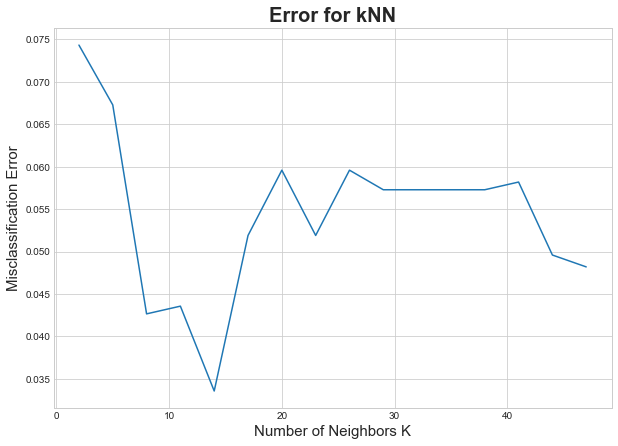

In [27]:
# changing to misclassification error
error = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(10,7))
plt.title('Error for kNN', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, error)
plt.show();

In [17]:
# finding best k
best_k = k_list[error.index(min(error))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 12.


<a id='decision_trees'></a>
# Decision Trees

Now that we've taken a good look at kNN and how useful it can be, let's take a look at a different type of modelling that also helps us classify points! 

Decision trees rely on the idea of **splitting up your data points with linear decision boundaries into different sections**. In order words, it's asking a series of yes or no questions to make our decision/estimation on which class an input point falls under.

Here's a couple examples of what a decision trees look like:

<img src='pictures/XKCD.png' width=35%>

As we can see from the tree above, we are able to answer a yes or no question at every step, and depending on our answer, we either went one way or another through the three. They are very synonymous to flowcharts, but we'll go into more intricacies with decision trees later on. In practice, with decision tree models, they won't have cycles, but they'll have the same logic structure. Here's another example of a decision tree made by Rosa!

<img src='pictures/meme.png' width=40%>

Meme credit to $\text{Rosa Choe}^{\text{TM}}$.

Now that we've seen a couple examples of decision trees, we can see how they can be used to help us classify a given input data point with a series of question to determine which class the data point lies within.

**Question:** How might you go about making the different components of a decision tree?

The intuition behind making a good decision tree is optimizing our questions (or different steps in the decision tree) to be able *to split up the data into as different categories as possible*. For example in the iris case, we would like to find a split where we may separate the various irises as much as possible. Now the question that arises, what is a good method through which we can determine these different bounds to split upon? We introduce the idea of **entropy**, where we minimize the entropy, or randomness in each split section of the data.

<a id='entropy'></a>
## Entropy

To begin, let's first define what entropy is. In the context of machine learning, entropy is **the measure of disorder  within a set** or the **amount of surprise**.

A great visualization for different entropies is as follows:
<img src='pictures/Entropy.png' width='50%'>

Let's say $Pr(X = 1)$ is the probability that you flips a heads, where heads is represented by $1$ and tails is represented by $0$. From this, we can see that the y-value, $H(X)$ (or calculated entropy), is at a minimum when the chance of flipping a heads is $0$ or $1$, but is at a maximum when the chance of flipping a heads is $0.5$. In other words, the data subset is the most random when there is an equal probability of all classes, and minimized when there are probabilites of classes that are equal to $0$.

Mathematical equation for Entropy:

$$H(\textbf{p}) = -\sum_i p_i \cdot \log(p_i)$$

where $H(\textbf{p})$ is equal to the total entropy of the data set, and $p_i$ is equal to the probability of something occurring.

**Something to note:** When you calculate the entropy on a subset with data points that are all the same class, you run into a mathematical error, which is because $\log_{2}(0)$ cannot be calculated. So, as an alternative to calculating $\log_{2}(0)$, we can bring in the following limit instead:

$$\lim _{p\to 0+}p\log(p)=0$$

Now what does this mean in the context of decision trees? Well, let's take a look at a random scatter of different points that are classified blue and orange.

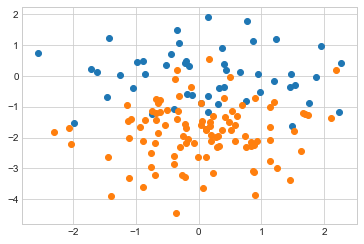

In [28]:
import numpy as np
import matplotlib.pyplot as plt

rng0 = np.random.RandomState(0)
rng1 = np.random.RandomState(1)

blueX = rng0.randn(50)
blueY = rng0.randn(50)
orangeX = rng1.randn(100)
orangeY = rng1.randn(100) - 2
plt.scatter(blueX, blueY);
plt.scatter(orangeX, orangeY);

In this example, we have $50$ blue points centered around `y=0` and $100$ orange points centered around `y=-2`.

From above, we can see that a good decision boundary to split our data might be at the line `y = -1`. But in order to back our visual findings with numerical proof, let's calculate the entropy of the set of data we have (which is basically just the entire data set as of now), and the entropy of each split data set weighted by the proportion of data points in each section. Now that might seem like a lot, but we'll break it down into different steps.

To begin, we've provided the following helper function to calculate entropy given a list of probabilities!

In [29]:
def entropy(probabilities):
    """
    Takes in probabilities as an array or list, and calculates the 
    Shannon's entropy of the set of data (defined above)
    """
    total = 0
    for prob in probabilities:
        total -= prob * np.log2(prob)
    return total

So, let's take a look at the entropy calculated from entire dataset itself.

In [30]:
# Input the probabilities of each class
# Hint: 2/3 of the points are orange, 1/3 of the points are blue
probabilities = ...

# TO REMOVE
probabilities = [50/150,100/150]
entropy(probabilities) 

0.9182958340544896

We can see that it's about $0.92$! But what does this metric mean? Well, to see its significance, let's take a look at the different entropies of the two data subsets we get after we split the data with the line `y = -1`.

Here's a plot of the data with a horizontal line drawn at `y = -1`!.

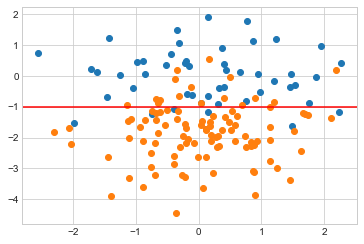

In [31]:
plt.scatter(blueX, blueY);
plt.scatter(orangeX, orangeY);
plt.axhline(y=-1, color='red');

Now, let's calculate the entropies of each of the two data subsets!

In [32]:
# Counting the number of orange and blue data points below the line y = -1.
orange_below_neg1= sum(orangeY < -1)
blue_below_neg1= sum(blueY < -1)

total_below = orange_below_neg1 + blue_below_neg1

# Calculating the entropy of the subset with data points with y-values less than -1.
bottom_entropy = entropy([orange_below_neg1 / total_below, blue_below_neg1 / total_below])

# Calculating the entropy of the subset with respective to its proportion size
bottom_entropy *= (total_below / 150) # 150 total data points
bottom_entropy

0.23735442860174844

Now, just from calculating the entropy in the subset of data points with y-values less than 1, and multiplying it by the proportion of data points in the lower subset, we see that it's already significantly lower than the entropy calculated from the entire dataset itself! However, we still need to calculate the entropy for the upper subset of data as well, and add those entropies up. Only if the summed entropies is less than the initial entropy level will we be able to conclude that this boundary we've created is useful.

DIY! Calculate the entropy of the subset of data points with y-values > -1 multiplied by the proportion of data points in that subset.

In [33]:
# Hint: Copy over what we did to calculate the bottom entropy, and change some things to get a value for the top entropy!
orange_above_neg1= sum(orangeY >= -1)
blue_above_neg1= sum(blueY >= -1)

top_entropy = ...

In [34]:

# TO REMOVE

# Counting the number of orange and blue data points below the line y = 1.
total_above = orange_above_neg1 + blue_above_neg1

# Calculating the entropy of the subset with data points with y-values less than 1.
top_entropy = entropy([orange_above_neg1 / total_above, blue_above_neg1 / total_above])

# Calculating the entropy of the subset with respective to its proportion size
top_entropy *= (total_above / 150) # 150 total data points
top_entropy

0.33164370306772284

In [35]:
assert top_entropy == 0.33164370306772284

Now, let's calculate the total entropy of both subsets!

In [36]:
total_entropy = bottom_entropy + top_entropy
total_entropy

0.5689981316694712

Nice! From this process, we can clearly see that $0.57$ is less than $0.92$, so the decision boundary we introduced made the overall entropy of the data points lower! We've now got two subsets of the data that have lower entropy, meaning there is less disorder in terms of proportion between the two classes within each subset. We've officially made our first branch our decision tree!


Now, we're able to see from a numerical approach on which decision boundaries would be effective in terms of classifying our data, but we it is not obvious how we chose the line `y = -1`! From the above example, we derived the line `y = -1` from looking at the data, but sometimes it's not so clear to determine where decision boundaries should lie. In practice, we just try many decision boundaries and use the one that minimizes overall entropy.

<a id='back_to_decision_trees'></a>
## Back to Decision Trees

Now that we've seen how entropy can help us determine which decision boundaries are good for our decision tree, let's get to constructing a decision tree of our own!

In [38]:
decision_tree = DecisionTreeClassifier('entropy')
decision_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Take a look at some of the different parameters that were printed! We have things ranging from `min_samples_leaf` to `max_features`; all different parameters that can construct our desired decision tree differently. Now, like any machine learning model, let's FIT it against some training data!

In [39]:
# Hint: Take a look a the documentation to see how we can fit our model against our iris using shift tab
# Hint: Keep in mind we have X_train and Y_train

#decision_tree.fit(...) 
# TO REMOVE:
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Nice! Now that we've constructed a decision tree off of the Iris data set, let's see what it looks like!

In [1]:
plot_tree('entropy', 'best', datasets.load_iris())

NameError: name 'plot_tree' is not defined

You might be able to tell that you can play around with the drop-down boxes and select which depth of tree you'd like to see, as well as input different kinds of datasets into the third argument of the `plot_tree` function. Try plugging in different kinds of data sets into the third argument of the function and see the different decision trees that pop up as a result! (Some data sets you can try out are `datasets.load_breast_cancer()` and `datasets.load_wine()`, but feel free to try other data sets that require classification!)

One thing that we want to highlight is that these decision trees stopped making decision boundaries (or branches) when the subsets were completely pure (entropy = 0)! That means that all the data points within that subset were all of the same class, and that we were able to classify every data point perfectly. Now, we can begin to classify future data points!

**Questions for understanding:**
> 1. Why don't we keep making deeper and deeper trees to get fully "pure" leaves?
> 2. How does bias and variance change with tree depth?

One thing we might notice with this strategy of splitting data points until they reach "pure" data subsets is that the decision trees will be liable to **overfitting**! Let's take a look at a great example:

<img src="pictures/DecisionTreeError.png" width="60%">
Image from http://www.cs.cornell.edu/courses/cs4780/2017sp/lectures/lecturenote17.html

**Question:** What are some methods to avoid overfitting (consider depth and number of samples in the leaves)?

Our solution to this problem of overfitting is limiting the number of splits your decision tree takes! By setting a certain quota for the number of splits your decision tree takes, we can ensure we don't end up with scenarios with the graph on the left, where we are too precisely creating decision boundaries.

Here's another good example!

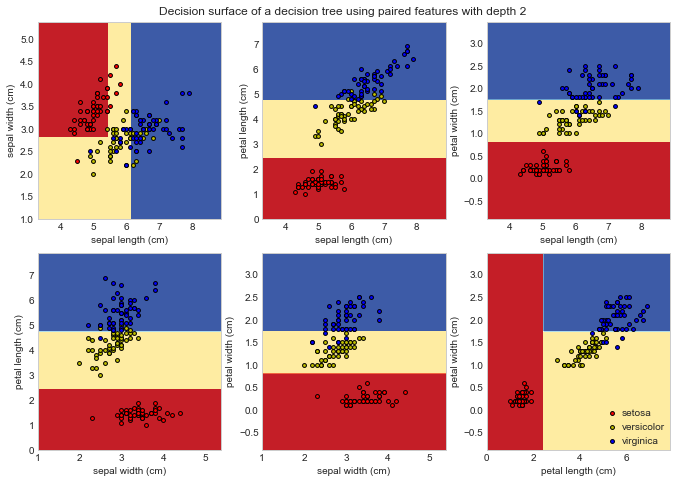

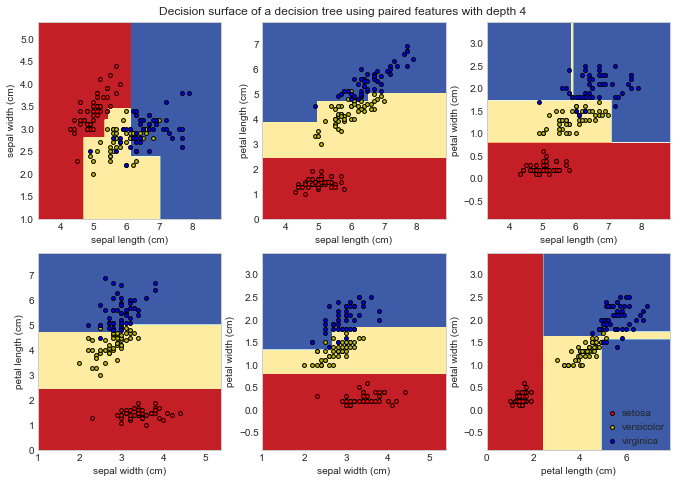

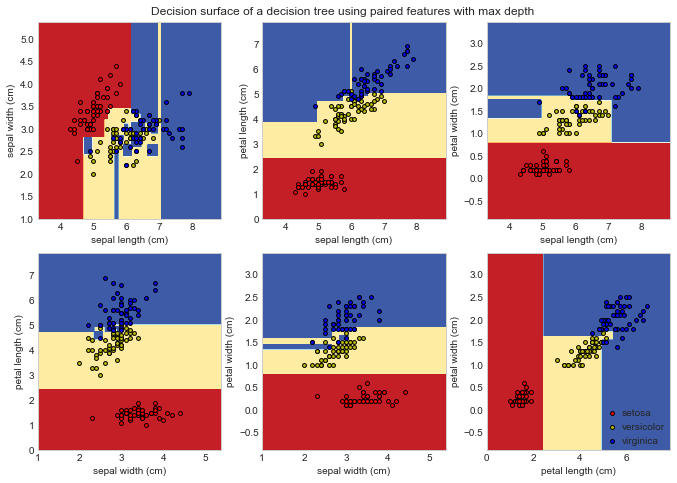

In [29]:
# From http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
# Max Depth 2
plotPairwiseDecisionTrees(2)
# Max Depth 4
plotPairwiseDecisionTrees(4)
# No Max Depth
plotPairwiseDecisionTrees()

**Questions for understanding:**
> 1. What do the colored points and regions represent?
> 2. What are some trends as the trees get deeper?
> 3. How do the decision boundaries change with depth?

As we can see, the deeper our tree goes, the higher the variance is within the tree, as the decision tree is tailored towards our training data, and could be completely different had we just added/removed a couple data points. However, it also has low bias, as it won't consistently classify certain data points incorrectly (it's too precise!)

Now, we'd love to have a decision tree that had both low bias and low variance, but it seems like it's a tradeoff for one or the other. So, it'd be ideal to get the best of both worlds, and get low bias and low variance. But how?

Idea: **What if we got more models trained on our dataset?**

This idea of training more models on our training set introduces the idea of **ensemble learning**, which we will go into further in the next section, and help us solve our dilemna of wanting both low bias and low variance!

<a id='ensemble_learning'></a>
# Ensemble Learning

<img src='pictures/elephant.jpeg' width="700" height="700">

This is the fable of the blind men and the elephant. Each individual is correct in their own right, however together their descriptions paint a much more accurate picture.

We have discussed notions of bias and variance. To refresh these concepts again,  


<center>
**Bias** is how well the average model would perform if you trained models on many data sets  
**Variance** is how different the models you would obtain if you trained models on many data sets. 
</center>

In practice, we only have one data set. If we train a model on this dataset, we would like to minimize both bias and variance. However, we can use some techniques to try to get the best of both worlds.

Since bias is talking about how well the average model performs, and variance is about how varied the different models are, we can attempt to minimizing both of these by considering an *average model*.

Consider the following analogy.

<img src='pictures/weather.jpg' width="700" height="700">

We would like to predict the weather tomorrow. Perhaps we have $3$ separate sources for weather, Channel $4$ on TV, a online website, and the iPhone weather application. 

We may expect that a better estimate for the weather tomorrow is actually the average of all these estimates. Perhaps the different sources all have their own methods and data for creating a prediction, thus taking the average pools together all their resources into a more powerful estimator. 

The important gain of this approach is our improvement in variance. Keep in mind this is mentioning how different would another similar estimator be. While a single source may have high variation, such as an online website, we would expect another averaged weather amalgamation would be similar. If we considered Channel $5$ predictions, a different online website, and the Android weather application, we would not expect as much variation between their predictions since we already took the average of multiple sources. 

Thus, one technique to improve the quality of a model is to *train multiple models on the same data and pool their predictions*. This is known as **ensembling**.



<a id='bootstrapping_and_bagging'></a>
# Bootstrapping and Bagging
An important idea often used in data science is **bootstrapping**. This is a method to generate more samples of data, despite the fact that we only have a single dataset.
<center>
**Bootstrapping**: We take the original dataset of size $N$ and draw $M$ samples with replacement of size $N$. 
</center>

For example, if we would like to estimate the average height of people in the U.S., we may take a sample of $1000$ people and average their heights. However, this does not tell us much about the data other than the average. We pooled together $1000$ data points into a single value, but there is much more information available. 

What we can do is draw many samples with replacement of size $1000$, and compute the average heights of these. This mimics as if we had many dataset, and we have many average heights. Then we can compute a distribute of average heights we would have collected, and from this we can determine how good our estimate is. By the Central Limit theorem, this distribution of bootstrapped statistics should approach the normal distribution.

However, we are not limited to just calculating the average. We may calculate the median, standard deviation, or any other statistic of each bootstrapped sample. Furthermore, we can even create a model for each sample! This allows us to utilize the notion of training many models on the same dataset.

If we create many models and then aggregate our predictions, this is known as **bagging** (bootstrapp aggregating). Thus we may create many separate models that all are trained on separate data to obtain new predictions and better results.

The purpose of bagging is to decrease the variance of our model. Since we essentially take many models together in parallel, we avoid overfitting and decreasing variance.

<a id='random_forest'></a>
# Random Forest

A single decision tree often results in poor predictions, as they are very simple and lack much complexity. Just cutting the feature space into separate regions does not perform very well, as these strict linear constraints prevent complex boundaries.

However, if we include many decision trees and create a **random forest**, we obtain drastically better results. 
The idea of a random forest is quite simple, take many decision trees and output their average guess.
<center>
<img src="pictures/RandomForest.png" width="60%">
Image from https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d
</center>


In the case of classification, we take the most popular guess.   
In the case of regression, we take some form of the average guess.


Now, let's consider this exact setup. What would happen if we created many decision trees and took the most popular guess?

In practice, we could obtain the same decision tree over and over. This is because there is some optimal set of splitting values in the dataset to minimize entropy, even with different sets of data. Perhaps we have one feature that works very well in splitting the data, and it is always utilized as the first split in the tree. Then all decision trees end up looking quite similar, despite our efforts in bagging.

A solution to this problem is feature bagging. We may also select a subset of features for each tree to train on, thus each feature has a chance to be split on. 
<center>
<img src="pictures/RandomForestPipeline.jpg" width="40%">
Image from https://sites.google.com/site/rajhansgondane2506/publications
</center>


In summary, we begin with a dataset $\mathcal{D}$ of size $N$. 
1. We bootstrap the data so that we have $M$ new datasets $d_1,\ldots, d_M$ drawn with replacement of size $N$ from $\mathcal{D}$.
2. Select a subset of features $f_i$ for each new dataset $d_i$.
3. Fit a decision tree for each $d_i$ with features $f_i$.

Now to predict, we take the input data and feed it through each decision tree to get an output. Then we can take the most popular vote or the average output as the output of our model, based on the type of problem we are attempting to solve.

<a id='boosting'></a>
# Boosting
We have mentioned bagging as a method of decreasing variance, but what about bias? There are also techniques to do this, namely **boosting**. This is a very popular technique in Kaggle competitions and most models that win competitions utilize huge ensembles of boosted random forests.

The exact implementation of boosting is out of scope for this discussion, but the main idea is to *fit your models sequentially rather than in parallel in bagging*.

In random forest, we take many samples of our data, and fit separate decision trees to each one. We account for similar decision trees by feature bagging as well. However, many of these decision trees will end up predicting similar things and essentially only reduce variance.

The key idea of boosting is to **emphasize the specific data points that we fail on**. Rather than trying to improve the prediction by considering the problem from different angles (e.g. new datasets from bagging or new features from feature bagging), consider where we predict incorrectly and attempt to improve our predictions from there.

<center>
<img src="pictures/Boosting.png" width="70%">
Image from https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/
</center>

This is similar to real life. If you would like to learn a new musical piece, it is more beneficial to practice the specific part that is challenging, rather than playing the entire piece from the start every time you mess up. By boosting our model, we attempt to place greater emphasis on the samples that we consistently misclassify.


For further reading, we highly recommend the following resources for explanations for boosting:  
https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/  
https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d

Spectacular visualizations of decision trees and boosting:  
http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html

There are many forms of boosting in practice. Popular ones include: Adaboost, GradientBoost, and XGBoost. XGBoost is famous (or infamous) for excelling at Kaggle competitions, most winning solutions contain XGBoost (if not many). We encourage you to look at the links above (especially the vis

**Questions for understanding:**
> 1. What is the purpose of bagging?
> 2. In Random Forest, how do we avoid getting similar decision trees?
> 3. How does bagging affect bias and variance?
> 4. What are the pros/cons of Random Forest vs Decision Trees?
> 5. What is the purpose of boosting?
> 6. What are methods of ensembling?


<a id='homework'></a>
# Homework

Note: If you've done any data cleaning in the previous notebooks, feel free to copy and paste it in here!

## Part 1: kNN
> 1. Implement kNN for the Kaggle competition using scikit-learn.
> 2. Experiment with various values of k in the scikit-learn kNN implementation, try to minimize RMSE.

## Part 2

> 1. Implement a decision tree for the Kaggle competition using scikit-learn.
> 2. Experiment with the various parameters in the scikit-learn decision tree implementation, and obtain a RMSE less than X.
> 3. Utilize our functions above to visualize the decision tree you created.
> 4. Implement a random forest for the Kaggle competition using scikit-learn, and obtain a RMSE less than Y.

In [136]:
import pandas as pd
train = pd.read_csv('DATA/train.csv')
test = pd.read_csv('DATA/test.csv')

#Let's see what the training dataframe looks like!
train.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [139]:
#Feel free to copy/replace with any data cleaning you want from before here
#NOTE: KNN only takes in scalar values (make sure you take)

#Just some random scalar features I selected --- FEEL FREE TO CHANGE
knn_features = ['LotFrontage', 'LotArea', 'OverallQual', \
            'OverallCond', 'YearBuilt', 'YearRemodAdd', \
            'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', \
            'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', \
            'GarageArea']
knn_train = train[knn_features + ['SalePrice']].copy()
knn_test = test[knn_features].copy()

knn_train.fillna(0, inplace = True)
knn_test.fillna(0, inplace = True)

knn_train.head(10)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,SalePrice
0,65.0,8450,7,5,2003,2003,856,856,854,1710,2,3,1,8,548,208500
1,80.0,9600,6,8,1976,1976,1262,1262,0,1262,2,3,1,6,460,181500
2,68.0,11250,7,5,2001,2002,920,920,866,1786,2,3,1,6,608,223500
3,60.0,9550,7,5,1915,1970,756,961,756,1717,1,3,1,7,642,140000
4,84.0,14260,8,5,2000,2000,1145,1145,1053,2198,2,4,1,9,836,250000
5,85.0,14115,5,5,1993,1995,796,796,566,1362,1,1,1,5,480,143000
6,75.0,10084,8,5,2004,2005,1686,1694,0,1694,2,3,1,7,636,307000
7,0.0,10382,7,6,1973,1973,1107,1107,983,2090,2,3,1,7,484,200000
8,51.0,6120,7,5,1931,1950,952,1022,752,1774,2,2,2,8,468,129900
9,50.0,7420,5,6,1939,1950,991,1077,0,1077,1,2,2,5,205,118000


## Part 1 KNN

#### Dividing the Dataframe into Feature and Labels

In [140]:
X = knn_train.loc[:, cleaned_train.columns != 'SalePrice'] #gets all the columns but SalePrice
Y = knn_train['SalePrice'].values

#### Splitting the Data into Train and Test Sets

In [141]:
#Splitting dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


#### Making Predictions

In [142]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsRegressor(n_neighbors=14)

# Fitting the model
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

#### Evaluating Predictions

In [1]:
#Calculating model accuracy
np.sqrt(np.mean((Y_test -Y_pred)**2))

#TRY TO MINIMIZE THIS!

NameError: name 'np' is not defined

## Part 2